# Drop Out Layer 변화 확인

In [1]:
import torch

n = torch.nn.Dropout(p = 0.5)
input = torch.randn(4,4)
output = n(input)
print(input)
print(output)

tensor([[-0.2646, -0.4513, -0.9562,  0.3141],
        [-0.6960,  1.2055,  1.1234,  0.7057],
        [ 1.6759, -1.4074,  0.2524,  1.6994],
        [-0.9584,  0.4801, -0.4617,  0.3619]])
tensor([[-0.0000, -0.0000, -0.0000,  0.6282],
        [-0.0000,  2.4110,  2.2467,  0.0000],
        [ 0.0000, -2.8149,  0.5047,  3.3987],
        [-1.9167,  0.9602, -0.0000,  0.7237]])


# Batch Normalization 확인하기

In [2]:
n = torch.nn.BatchNorm1d(5)
input = torch.randn(5,5)
output = n(input)
print(input)
print(output)
print(output.mean(axis = 0),output.var(axis=0))

tensor([[-0.7154,  0.0850, -0.6979, -0.6353,  0.3340],
        [ 0.8334, -0.1847,  0.1409,  1.1112, -1.9953],
        [ 0.5498, -0.8954,  0.4661,  0.7140, -0.1481],
        [ 0.1469,  0.0719, -1.0601,  0.1432, -0.6314],
        [-0.7982,  0.1669, -1.7535,  0.2574, -1.1155]])
tensor([[-1.0916,  0.6053, -0.1455, -1.6212,  1.3008],
        [ 1.2608, -0.0856,  0.8973,  1.3487, -1.5980],
        [ 0.8300, -1.9065,  1.3015,  0.6732,  0.7008],
        [ 0.2182,  0.5717, -0.5957, -0.2974,  0.0994],
        [-1.2174,  0.8152, -1.4576, -0.1033, -0.5031]],
       grad_fn=<NativeBatchNormBackward0>)
tensor([ 2.3842e-08,  3.5763e-08,  2.3842e-08, -7.4506e-09, -5.9605e-08],
       grad_fn=<MeanBackward1>) tensor([1.2500, 1.2499, 1.2500, 1.2500, 1.2500], grad_fn=<VarBackward0>)


# Weight Decay

In [3]:
import torch

In [4]:
# device 설정 (gpu & cpu)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# random seed 고정 (항상 같은 결과값이 나오게 하기 위함)
torch. manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [5]:
x_train = torch.FloatTensor([[1, -0.3, 0.8],
                             [0.7, 0.2, 0.6],
                             [0.3, 0.5, 0.3],
                             [1, 1, 1.1],
                             [-1, -1.5, -1.2]]).to(device)
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]]).to(device)

In [6]:
model = torch.nn.Linear(3,1).to(device)

In [7]:
criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-10,weight_decay = 1)

In [8]:
for epoch in range(20):
  hypothesis = model(x_train)
  cost = criterion(hypothesis,y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  print(epoch, cost.item())

0 29797.48828125
1 29797.48828125
2 29797.48828125
3 29797.48828125
4 29797.48828125
5 29797.48828125
6 29797.48828125
7 29797.48828125
8 29797.48828125
9 29797.48828125
10 29797.48828125
11 29797.48828125
12 29797.48828125
13 29797.48828125
14 29797.48828125
15 29797.48828125
16 29797.48828125
17 29797.48828125
18 29797.48828125
19 29797.48828125


# Drop Out

In [9]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
# 데이터를 훈련용과 테스트용으로 분리
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from torchsummary import summary
import matplotlib.pyplot as plt

# 전체의 20%는 검증용
digits = load_digits()
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train = torch.tensor(Y_train, dtype=torch.int64).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test = torch.tensor(Y_test, dtype=torch.int64).to(device)

In [10]:
linear1 = torch.nn.Linear(64,100,bias=True)
linear2 = torch.nn.Linear(100,100,bias=True)
linear3 = torch.nn.Linear(100,100,bias=True)
linear4 = torch.nn.Linear(100,100,bias=True)
linear5 = torch.nn.Linear(100,10,bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(0.5)
batch = torch.nn.BatchNorm1d(100)

In [11]:
from torch.nn.modules import linear
model1 = torch.nn.Sequential(linear1,relu,linear2,relu,linear3,relu,linear4,relu,linear5).to(device)

In [12]:
lossFunc = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds,batch_size= 32, shuffle = True)
trainLosses= []
testLosses = []

100%|██████████| 100/100 [00:14<00:00,  7.14it/s]


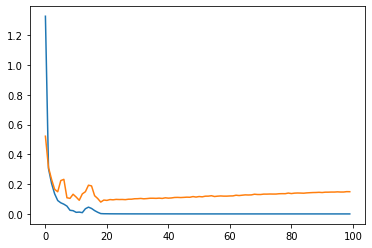

In [13]:
for epoch in tqdm(range(100)):
  runningLoss = 0.0
  model1.train()
  for i , (batchX,batchY) in enumerate(loader):
    optimizer.zero_grad()
    yPred = model1(batchX)
    loss = lossFunc(yPred, batchY)
    loss.backward()
    optimizer.step()
    runningLoss += loss.item()
  

  trainLosses.append(runningLoss/i)
  model1.eval()
  yPred = model1(X_test)
  testLoss = lossFunc(yPred, Y_test)
  testLosses.append(testLoss.item())

plt.plot(range(100),trainLosses,label = 'train_loss')

plt.plot(range(100),testLosses,label = 'test_loss')

In [15]:
print(trainLosses)

[1.3270812325856902, 0.30433583225716243, 0.20467178244143724, 0.13489921657707205, 0.08990736140615561, 0.07457416667602956, 0.06530701741576195, 0.05239306499292566, 0.024353758643635294, 0.02169909980148077, 0.010736411762825976, 0.012258646004325286, 0.008510512772111477, 0.034720662764315915, 0.045487566534906036, 0.03672718506608031, 0.02233458813068203, 0.011151946024752264, 0.002221023545809492, 0.0012321708013173934, 0.0010306342426867393, 0.0007639021306121405, 0.0006133818546500565, 0.0005273036557065842, 0.0004590921812037281, 0.00040061955256863837, 0.0003576729424036206, 0.0003168118511935476, 0.0002827650219346238, 0.0002615957088313404, 0.00023530538022565781, 0.00020993681729661066, 0.00019280932896105117, 0.00017882478699572278, 0.00016687420657035545, 0.00015059433673575933, 0.00014213017588686356, 0.00012761421579522323, 0.00011966616330028046, 0.00010978529307563308, 0.00010466880731159604, 9.645394329089123e-05, 9.148719777840597e-05, 8.363810051874184e-05, 8.0820

In [17]:
model1 = torch.nn.Sequential(linear1,relu,dropout,linear2,relu,dropout,linear3,relu,dropout,linear4,relu,dropout,linear5).to(device)

In [18]:
lossFunc = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds,batch_size= 32, shuffle = True)
trainLosses= []
testLosses = []

100%|██████████| 100/100 [00:12<00:00,  8.07it/s]


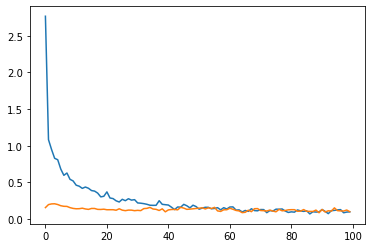

In [19]:
for epoch in tqdm(range(100)):
  runningLoss = 0.0
  model1.train()
  for i , (batchX,batchY) in enumerate(loader):
    optimizer.zero_grad()
    yPred = model1(batchX)
    loss = lossFunc(yPred, batchY)
    loss.backward()
    optimizer.step()
    runningLoss += loss.item()
  

  trainLosses.append(runningLoss/i)
  model1.eval()
  yPred = model1(X_test)
  testLoss = lossFunc(yPred, Y_test)
  testLosses.append(testLoss.item())

plt.plot(range(100),trainLosses,label = 'train_loss')

plt.plot(range(100),testLosses,label = 'test_loss')

In [22]:
summary(model.to(device),(64,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           6,500
              ReLU-2                  [-1, 100]               0
           Dropout-3                  [-1, 100]               0
            Linear-4                  [-1, 100]          10,100
              ReLU-5                  [-1, 100]               0
           Dropout-6                  [-1, 100]               0
            Linear-7                  [-1, 100]          10,100
              ReLU-8                  [-1, 100]               0
           Dropout-9                  [-1, 100]               0
           Linear-10                  [-1, 100]          10,100
             ReLU-11                  [-1, 100]               0
          Dropout-12                  [-1, 100]               0
           Linear-13                   [-1, 10]           1,010
Total params: 37,810
Trainable params: 

# Batch Normalization

In [25]:
model1 = torch.nn.Sequential(linear1,relu,batch,dropout,linear2,relu,batch,dropout,linear3,relu,batch,dropout,linear4,relu,batch,dropout,linear5).to(device)

In [27]:
summary(model.to(device),(64,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           6,500
              ReLU-2                  [-1, 100]               0
           Dropout-3                  [-1, 100]               0
            Linear-4                  [-1, 100]          10,100
              ReLU-5                  [-1, 100]               0
           Dropout-6                  [-1, 100]               0
            Linear-7                  [-1, 100]          10,100
              ReLU-8                  [-1, 100]               0
           Dropout-9                  [-1, 100]               0
           Linear-10                  [-1, 100]          10,100
             ReLU-11                  [-1, 100]               0
          Dropout-12                  [-1, 100]               0
           Linear-13                   [-1, 10]           1,010
Total params: 37,810
Trainable params: 

100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


ValueError: ignored

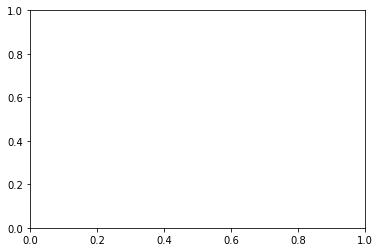

In [28]:
for epoch in tqdm(range(100)):
  runningLoss = 0.0
  model1.train()
  for i , (batchX,batchY) in enumerate(loader):
    optimizer.zero_grad()
    yPred = model1(batchX)
    loss = lossFunc(yPred, batchY)
    loss.backward()
    optimizer.step()
    runningLoss += loss.item()
  

  trainLosses.append(runningLoss/i)
  model1.eval()
  yPred = model1(X_test)
  testLoss = lossFunc(yPred, Y_test)
  testLosses.append(testLoss.item())

plt.plot(range(100),trainLosses,label = 'train_loss')

plt.plot(range(100),testLosses,label = 'test_loss')

# weight initialization

In [29]:
torch.nn.init.xavier_uniform_(linear1.weight)

Parameter containing:
tensor([[ 0.1278,  0.1480,  0.0452,  ...,  0.1691, -0.1038,  0.0080],
        [ 0.1848,  0.1780,  0.0164,  ...,  0.1512, -0.1117,  0.1663],
        [ 0.1899, -0.1335, -0.1330,  ..., -0.1169,  0.1828,  0.0125],
        ...,
        [-0.1254,  0.1171, -0.1290,  ..., -0.0265, -0.0604, -0.1240],
        [-0.0576, -0.1510, -0.1909,  ..., -0.0928, -0.0906,  0.0447],
        [-0.1126,  0.0703, -0.1197,  ...,  0.0989, -0.1841,  0.1068]],
       device='cuda:0', requires_grad=True)